# SOLUTION TO THE PROJECT TRAFFIC SIGN CLASSIFIER.


### Questions to be answered in this project following the rubric.
- 1)  Summary of the given dataset.
- 2)  Vizualization of the given dataset.
- 3)  What are the pre-porcessing techniques used and why?
- 4)  Summarize the train and test data setup, data augmentation methods.
- 5)  How does the final architecture of the setup look like, and why?. Give a visual feed.
- 6)  HOW WAS THE MODEL TRAINED, which optimizer is used and why, what is the batch size, number of epochs, and hyperparameters.
- 7)  What are the approaches followed towards a solution to the stated problem. How good is the final approach (based on the         percentage of accuracy).
- 8)  Test the model on five new German trafffic sign images from web.
- 9)  Is the model able to perform equally well on captured pictures or a live camera stream when compared to testing on the           dataset.
- 10) Use the model's softmax probabilities to visualize the certainty of its predictions, tf.nn.top_k could prove helpful here.       Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the             correct prediction appear in the top k? (k should be 5 at most)
- 11) If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired           images.
- 12) Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for           interesting characteristics in traffic sign images 

### Steps followed sequentially during the exection of the classifier system:
#### Step 1: Data Exploration.
#### Step 2: Visualize the Data and Summarize the data.
#### Step 3: Design and Test a model Architecture.
#### Step 4: Test the model on new Images.
#### Step 5: Store the Model for future use.
#### Step 6: Summarize the entire solution.
#### Step 7: Acknowledgements and sources.

**Data exploration and augmentation is performed in : traffic-sign-classifier-data-augmentation.ipynb file, the train, test, and validation sets are pickled into modelsol directory with respective file names for retrieval. **

### STEP: 3 Design and Test the model architecture.

- Q5) How does the final architecture of the setup look like, and why?. Give a visual feed.
- Q6) HOW WAS THE MODEL TRAINED, which optimizer is used and why, what is the batch size, number of epochs, and hyperparameters.
- Q7) What are the approaches followed towards a solution to the stated problem. How good is the final approach (based on the         percentage of accuracy).

In [1]:
# import the required libraries and packages
import numpy as np
import tensorflow as tf
import cv2
import csv
import pickle
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.gridspec as gridspec #check step:7 #http://matplotlib.org/users/gridspec.html
import os
import sys
#import time as time
import time
from datetime import timedelta
from timeit import default_timer as timer # check step:7 #https://docs.python.org/2/library/timeit.html
import random
from sklearn.preprocessing import OneHotEncoder # check step:7 #http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
#from sklearn.cross_validation import train_test_split, this is depricated in tensorflow 1.0 and used as .model_selection method.
from sklearn.model_selection import train_test_split
from PIL import Image as pimag
from IPython.display import Image as ipimag
from IPython.display import display as ipdis
import pandas as pd
import prettytensor as pt # checkstep:7 # https://github.com/google/prettytensor
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix # check step:7 #http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# var init
indir = 'traffic_sign_data'
outdir = 'modelsol'
sess = tf.InteractiveSession() # check step:7 #https://www.tensorflow.org/versions/r0.11/api_docs/python/client/session_management#InteractiveSession
SEED = 200
random.seed(SEED) # http://stackoverflow.com/questions/22639587/random-seed-what-does-it-do
np.random.seed(SEED)
tf.set_random_seed(SEED) # https://www.tensorflow.org/api_docs/python/tf/set_random_seed
%matplotlib inline

In [2]:
#  LOAD THE DATA
def load_augmented_data(X_train,X_test,y_train,y_test,X_val,y_val,signf): 
    X_train = outdir +'/'+X_train
    y_train = outdir +'/'+y_train
    X_test  = outdir +'/'+X_test
    y_test  = outdir +'/'+y_test
    X_val   = outdir +'/'+X_val
    y_val   = outdir +'/'+y_val    
    classnames_file = indir +'/'+signf

    classnames = []
    with open(classnames_file) as _f:
        rows = csv.reader(_f, delimiter=',')
        next(rows, None)  # skip the headers
        for i, row in enumerate(rows):
            assert(i==int(row[0]))
            classnames.append(row[1])
 
    X_train = pickle.load( open( X_train, "rb" ) )
    y_train = pickle.load( open( y_train, "rb" ) )
    X_test = pickle.load( open( X_test, "rb" ) )
    y_test = pickle.load( open( y_test, "rb" ) )
    X_val = pickle.load( open( X_val, "rb" ) )
    y_val = pickle.load( open( y_val, "rb" ) )
    
    
    X_train  = X_train.astype(np.float32)
    y_train  = y_train.astype(np.int32)
    X_test   = X_test.astype(np.float32)
    y_test   = y_test.astype(np.int32)
    X_val    = X_val.astype(np.float32)
    y_val    = y_val.astype(np.int32)
    
    return  classnames, X_train, y_train, X_test, y_test,X_val,y_val

In [3]:
classnames, X_train, y_train, X_test, y_test,X_val,y_val = load_augmented_data(X_train='X_train-org.p',X_test='X_test-org.p',y_train='y_train-org.p',y_test='y_test-org.p',X_val='X_val-org.p',y_val='y_val-org.p',signf='signnames.csv')

In [4]:
# data set parameters after augmentation
num_train = len(X_train)
num_test = len(X_test)
num_val = len(X_val)
_, height, width, channel = X_train.shape
image_shape = (height, width, channel)

num_class = len(np.unique(y_train))

print("Number of training examples =", num_train )
print("Number of testing examples =", num_test )
print("Number of validation examples = ", num_val)
print("Image data shape =", image_shape)
print("Number of classes =", num_class)

Number of training examples = 83076
Number of testing examples = 17802
Number of validation examples =  17802
Image data shape = (32, 32, 3)
Number of classes = 43


In [5]:
def insert_subimage(image, sub_image, y, x): 
    h, w, c = sub_image.shape
    image[y:y+h, x:x+w, :]=sub_image 
    return image

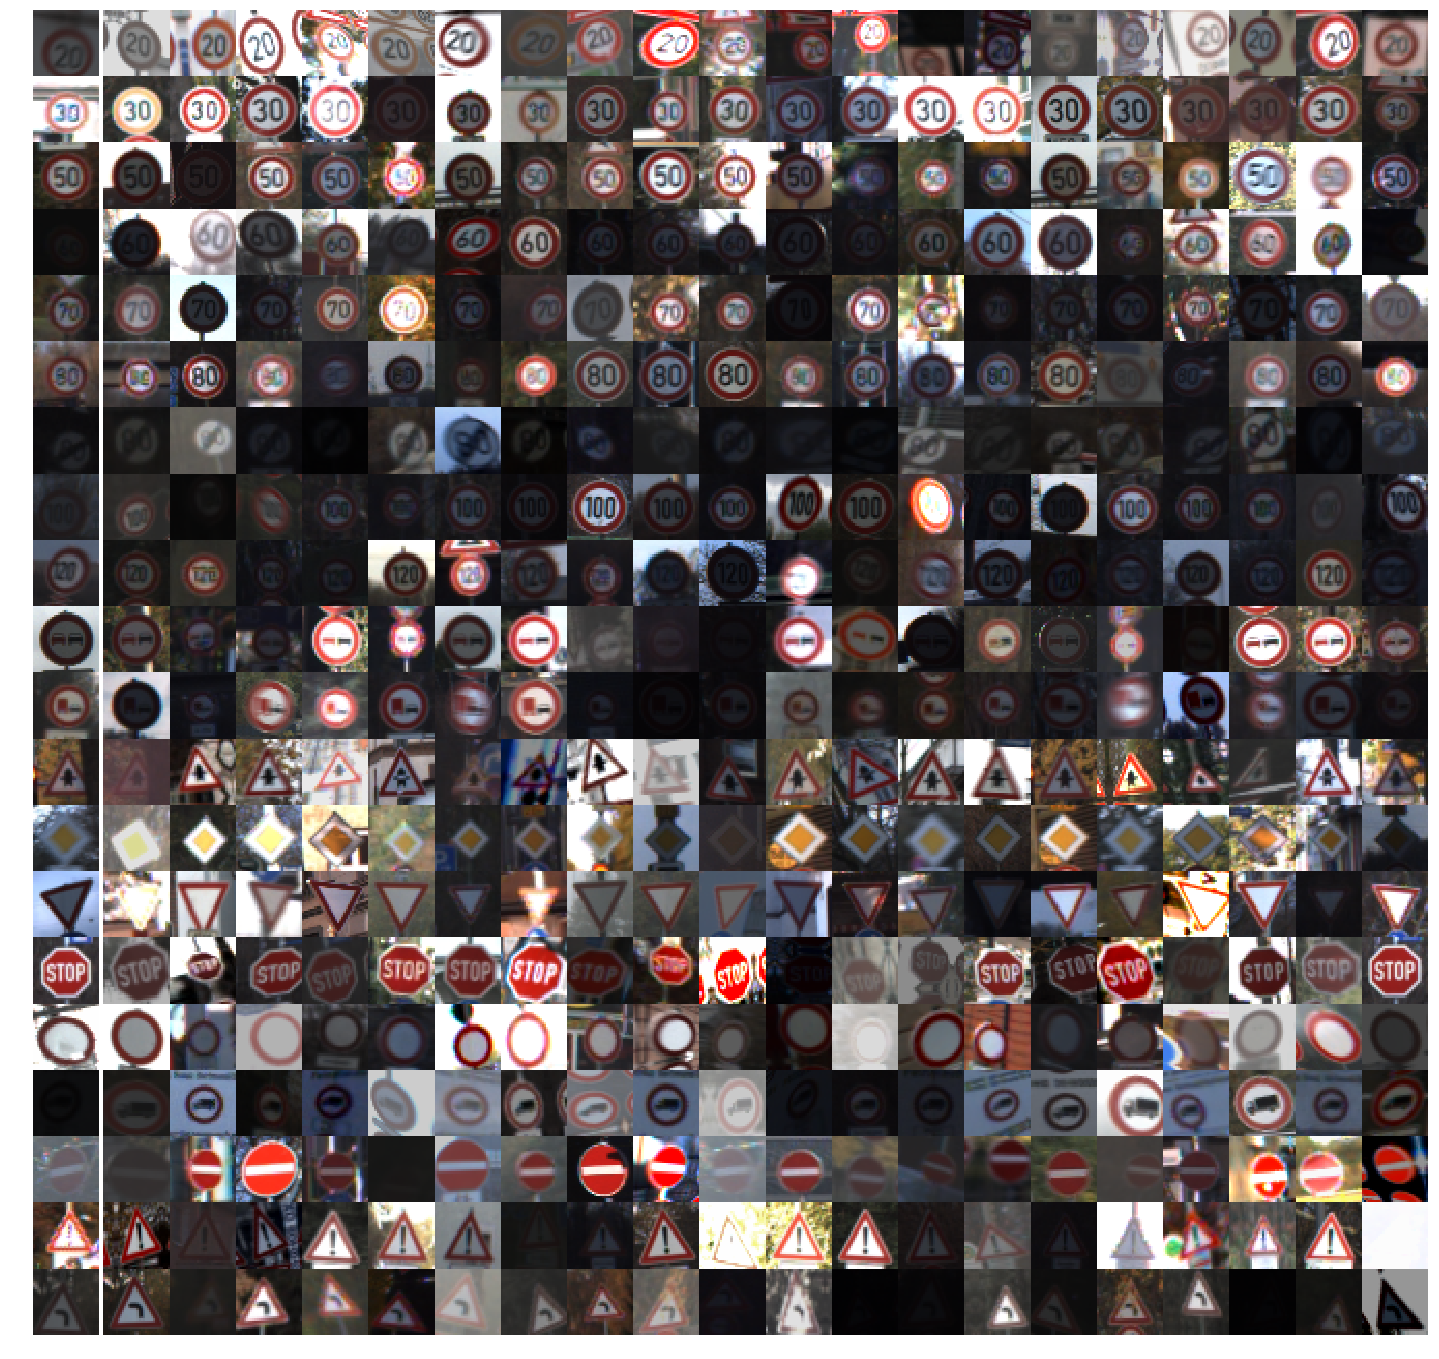

In [6]:
images, labels = X_train, y_train
#imageso, labelso = Xo_train, yo_train
num_train_flip = len(X_train)
num_sample = 20
perturbance_per_sample = 20

results_image = 255. * np.ones(shape=(num_sample * height, (perturbance_per_sample+1)* width+2, channel),dtype=np.float32)

for j in range(num_sample):
    i = random.randint(0, num_train_flip - 1)
    idx = list(np.where(labels== j)[0])
    idxo = list(np.where(labels==j)[0])

    image = images[np.random.choice(idxo)]
    insert_subimage(results_image, image, j * height, 0)

    for k in range(0, perturbance_per_sample):
        t_image = images[np.random.choice(idx)]
        insert_subimage(results_image, t_image, j*height, (k+1)*width+2)

         
cv2.imwrite(outdir+'/data_transform.jpg',cv2.cvtColor(results_image, cv2.COLOR_BGR2RGB))
plt.rcParams["figure.figsize"] = (25,25)
plt.imshow(results_image.astype(np.uint8))
plt.axis('off') 
plt.show()

To create a network we need to define the network funnctions.

In [5]:
IS_TRAIN_PHASE = tf.placeholder(dtype=tf.bool, name='is_train_phase')

def conv2d(input, num_kernels=1, kernel_size=(1,1), stride=[1,1,1,1], padding='SAME', has_bias=True, name='conv'):
    input_shape = input.get_shape().as_list()
    assert len(input_shape)==4
    C = input_shape[3]
    H = kernel_size[0]
    W = kernel_size[1]
    K = num_kernels
    weight = tf.get_variable(name=name+'_w', shape=[H, W, C, K], initializer=tf.truncated_normal_initializer(stddev=0.1))
    conv = tf.nn.conv2d(input, weight, strides=stride, padding=padding, name=name)
    if has_bias:
        bias = tf.get_variable(name=name + '_b', shape=[K], initializer=tf.constant_initializer(0.0))
        conv = conv+bias
    return conv


def relu(input, name='relu'):
    act = tf.nn.relu(input, name=name)
    return act

def prelu(input, name='prelu'):#https://arxiv.org/pdf/1502.01852.pdf
  alpha = tf.get_variable(name=name+'_a', shape=input.get_shape()[-1],initializer=tf.random_uniform_initializer(minval=0.1, maxval=0.3),dtype=tf.float32)
  pos = tf.nn.relu(input)
  neg = alpha * (input - abs(input)) * 0.5
  return pos + neg


def vlrelu(input, alpha=0.25, name='vlrelu'): #  alpha between 0.1 to 0.4
    act =tf.maximum(alpha*input,input)
    return act

def maxpool(input, kernel_size=(1,1), stride=[1,1,1,1], padding='SAME', has_bias=True, name='max' ):
    H = kernel_size[0]
    W = kernel_size[1]
    pool = tf.nn.max_pool(input, ksize=[1, H, W, 1], strides=stride, padding=padding, name=name)
    return pool

def avgpool(input, kernel_size=(1,1), stride=[1,1,1,1], padding='SAME', has_bias=True, is_global_pool=False, name='avg'):

    if is_global_pool==True:
        input_shape = input.get_shape().as_list()
        assert len(input_shape) == 4
        H = input_shape[1]
        W = input_shape[2]
        pool = tf.nn.avg_pool(input, ksize=[1, H, W, 1], strides=[1,H,W,1], padding='VALID', name=name)
        pool = flatten(pool)
    else:
        H = kernel_size[0]
        W = kernel_size[1]
        pool = tf.nn.avg_pool(input, ksize=[1, H, W, 1], strides=stride, padding=padding, name=name)
    return pool


def dropout(input, keep=1.0, name='drop'):
    drop = tf.cond(IS_TRAIN_PHASE,lambda: tf.nn.dropout(input, keep),lambda: tf.nn.dropout(input, 1))
    return drop


def flatten(input, name='flat'):
    input_shape = input.get_shape().as_list()        
    dim   = np.prod(input_shape[1:])                 
    flat  = tf.reshape(input, [-1, dim], name=name)  
    return flat

def concat(input, name='cat'):
    cat = tf.concat(axis=3, values=input, name=name)
    return cat


def bn (input, decay=0.9, eps=1e-5, name='bn'):#http://r2rt.com/implementing-batch-normalization-in-tensorflow.html
    #http://ruishu.io/2016/12/27/batchnorm/
    with tf.variable_scope(name) as scope:
        bn = tf.cond(IS_TRAIN_PHASE,lambda: tf.contrib.layers.batch_norm(input,decay=decay, epsilon=eps, center=True, scale=True,is_training=1,reuse=None,updates_collections=None, scope=scope),lambda: tf.contrib.layers.batch_norm(input, decay=decay, epsilon=eps, center=True, scale=True,is_training=0, reuse=True,updates_collections=None, scope=scope))
    return bn


In [6]:
def cbr(input, num_kernels=1, kernel_size=(1,1), stride=[1,1,1,1], padding='SAME', name='cbr'):
    with tf.variable_scope(name) as scope:
        block = conv2d(input, num_kernels=num_kernels, kernel_size=kernel_size, stride=stride, padding=padding, has_bias=False)
        block = bn(block)
        block = relu(block)
    return block
def brc(input, num_kernels=1, kernel_size=(1, 1), stride=[1, 1, 1, 1], padding='SAME', name='brc'):
    with tf.variable_scope(name) as scope:
        block = bn(input)
        block = relu(block)
        block = conv2d(block, num_kernels=num_kernels, kernel_size=kernel_size, stride=stride, padding=padding, has_bias=False)
    return block

def dense_bcrd(input,num_kernels=1, num=1,kernel_size=(1,1),drop=None,name='dense_bcrd'):
    block= input
    for n in range(num):
        with tf.variable_scope(name+'_%d'%n) as scope:
            conv = bn(block)
            conv = conv2d(conv,num_kernels=num_kernels, kernel_size=kernel_size,stride=[1,1,1,1],padding='SAME', has_bias=False)
            conv = relu(conv)
            
            if drop is not None:
                keep = (1-drop)**(1./num)
                conv = dropout(conv, keep=keep)
            block = concat((block,conv))
    return block

In [7]:
def l2_regulariser(decay):
    variables = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES)
    for v in variables:
        name = v.name
        if 'w' in name:  #this is weight
            l2 = decay * tf.nn.l2_loss(v)
            tf.add_to_collection('losses', l2)
        elif 'b' in name:  #this is bias
            pass
        elif 'beta' in name:
            pass
        elif 'gamma' in name:
            pass
        elif 'moving_mean' in name:
            pass
        elif 'moving_variance' in name:
            pass
        elif 'moments' in name:
            pass

        else:
            #pass
            #raise Exception('unknown variable type: %s ?'%name)
            pass

    l2_loss = tf.add_n(tf.get_collection('losses'))
    return l2_loss


def cross_entropy(logit, label, name='cross_entropy'):
    label = tf.cast(label, tf.int64)
    cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logit, labels=label), name=name)
    return cross_entropy


def accuracy(prob, label, name='accuracy'):
    correct_prediction = tf.equal(tf.argmax(prob, 1), tf.cast(label, tf.int64))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name=name)
    return accuracy


In [1]:
def DenseNet_3( input_shape=(1,1,1), output_shape = (1)):

    H, W, C   = input_shape
    num_class = output_shape
    input     = tf.placeholder(shape=[None, H, W, C], dtype=tf.float32, name='input')
    
    with tf.variable_scope('preprocess') as scope:
        input = bn(input,name='b1')
        input = conv2d(input, num_kernels=8, kernel_size=(3, 3), stride=[1, 1, 1, 1], padding='SAME', has_bias=True,name='c1')
        input = prelu(input,name='pr1')
        input = conv2d(input, num_kernels=8, kernel_size=(1, 1), stride=[1, 1, 1, 1], padding='SAME', has_bias=True,name='c2')
        input = prelu(input,name='pr2')


    with tf.variable_scope('block1') as scope:
        block1 = cbr(input, num_kernels=32, kernel_size=(5, 5), stride=[1, 1, 1, 1], padding='SAME')
        block1 = maxpool(block1, kernel_size=(2,2), stride=[1, 2, 2, 1], padding='SAME')
    with tf.variable_scope('block2') as scope:
        block2 = dense_bcrd(block1, num=1, num_kernels=16, kernel_size=(3, 3), drop=None)
        block2 = maxpool(block2, kernel_size=(2, 2), stride=[1, 2, 2, 1], padding='SAME')

    with tf.variable_scope('block3') as scope:
        block3 = dense_bcrd(block2, num=1, num_kernels=24, kernel_size=(3, 3), drop=None)
        block3 = dropout(block3, keep=0.9)
        block3 = maxpool(block3,  kernel_size=(2,2), stride=[1, 2, 2, 1], padding='SAME')

    with tf.variable_scope('block4') as scope:
        block4 = dense_bcrd(block3, num=1, num_kernels=32, kernel_size=(3, 3), drop=None)
        block4 = cbr(block4, num_kernels=num_class, kernel_size=(1,1), stride=[1, 1, 1, 1], padding='SAME')
        block4 = dropout(block4, keep=0.9)
        block4 = avgpool(block4, is_global_pool=True)


    logit = block4
    return logit


In [2]:
make_net = DenseNet_3  #LeNet_0  #LeNet_1

logit  = make_net(input_shape =(height, width, channel), output_shape=(num_class))
data   = tf.get_default_graph().get_tensor_by_name('input:0')
label  = tf.placeholder(dtype=tf.int32, shape=[None])
prob   = tf.nn.softmax(logit)

l2     = l2_regulariser(decay=0.0005)
loss   = cross_entropy(logit, label)
metric = accuracy(prob, label)

NameError: name 'height' is not defined

In [10]:
def generate_train_batch_next(datas, labels, n, batch_size):
    i = n*batch_size
    batch_datas  = datas [i:i+batch_size]
    batch_labels = labels[i:i+batch_size]
    return batch_datas, batch_labels

In [11]:
def schdule_by_step( r, steps=(0,100), items=(0.1,0.01)):

    item = items[0]
    N=len(steps)
    for n in range(N):
        if r >= steps[n]:
            item = items[n]
    return item


#for testing and validation
def test_net( datas, labels, batch_size, data, label, loss, metric, sess):

    num = len(datas)
    all_loss = 0
    all_acc = 0
    all = 0
    for n in range(0, num, batch_size):
        #print('\r  evaluating .... %d/%d' % (n, num), end='', flush=True)
        start = n
        end = start+batch_size if start+batch_size<=num else num
        batch_datas  = datas  [start:end]
        batch_labels = labels [start:end]

        fd = {data: batch_datas, label: batch_labels, IS_TRAIN_PHASE : False}
        test_loss, test_acc = sess.run([loss, metric], feed_dict=fd)

        a = end-start
        all += a
        all_loss += a*test_loss
        all_acc  += a*test_acc

    assert(all==num)
    loss = all_loss/all
    acc  = all_acc/all

    return loss, acc

In [14]:
#solver 
keep = 0.20   # 0.50   0.25 0.20   #0.15
num_per_class = 20000
#num_argument = num_per_class*num_class
num_class = 43
epoch_log  = 2 
max_run    = 9
batch_size = 128  #256  #96  384  #128
steps = (0, 3, 6, 8)  
rates = (0.1, 0.01,  0.001, 0.0001) 

learning_rate = tf.placeholder(tf.float32, shape=[])
solver = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.9)
solver_step = solver.minimize(loss+l2)



# start training here ------------------------------------------------
print ('start training')
sess.run(tf.global_variables_initializer(), feed_dict = {IS_TRAIN_PHASE : True } )
saver  = tf.train.Saver()
#writer = tf.summary.FileWriter(out_dir + '/tf', graph=tf.get_default_graph())


# keep a log   
print('')
print(' run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time ')
print('----------------------------------------------------------------------------------------------')

tic = timer()
iter = 0
for r in range(max_run):
    rate = schdule_by_step(r, steps=steps, items=rates)

    argument_images, argument_labels = X_train, y_train
    #argument_images = make_perturb_images(argument_images, keep=keep)


    num_argument = len(argument_images)
    N = max(num_argument//batch_size-1,1)
    #iter_log = round(float(num_train) / float(num_argument) * float(N))
    iter_log = max(round(float( epoch_log *num_train ) / float(batch_size)),1)
    for n in range(N):
        iter  = iter + 1
        run   = r + float(n)/float(N)
        epoch = float(iter*batch_size)/float(num_train)

        batch_datas, batch_labels = generate_train_batch_next( argument_images, argument_labels, n, batch_size )

        fd = {data: batch_datas, label: batch_labels, learning_rate: rate, IS_TRAIN_PHASE : True }
        _, batch_loss, batch_acc, = sess.run([solver_step, loss, metric ],feed_dict=fd)

      
        print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f)  ' %
                  (run, epoch, iter, rate, batch_loss, batch_acc), end='', flush=True)

        #do validation here!
        if iter%iter_log==0 or (r==max_run-1 and n==N-1): 
            toc = timer()
            sec_pass = toc - tic
            min_pass = sec_pass/60.

            #validation
            val_loss, val_acc =  test_net(X_val, y_val, batch_size, data, label, loss, metric, sess)

            #print('\r')
            print('\r%4.1f  %5.1f   %05d   %f |  %f    (%f) |  %f    (%f) | %4.1f min' %
                  (run, epoch, iter, rate, batch_loss, batch_acc, val_loss, val_acc, min_pass ), end='\n',flush=True)


        pass

    # save intermediate checkpoint
    # saver.save(sess, out_dir + '/check_points/%06d.ckpt'%r)  #iter


#final test! ------------------------------------------
# save final checkpoint
os.makedirs (outdir + '/check_points/final_1.ckpt',exist_ok=True)
saver.save(sess,outdir + '/check_points/final_1.ckpt')

print('\n') 
print('** evaluation on test set **' )
test_loss, test_acc = test_net(X_test, y_test, batch_size, data, label, loss, metric, sess)
print('test_loss=%f    (test_acc=%f)' % ( test_loss, test_acc))

 


start training

 run  epoch   iter    rate      |  train_loss    (acc)     |  valid_loss    (acc)     |  time 
----------------------------------------------------------------------------------------------
 2.0    2.0   01298   0.100000 |  0.327814    (0.921875) |  0.393466    (0.885462) |  1.7 min
 4.0    4.0   02596   0.010000 |  0.134194    (0.960938) |  0.090080    (0.977137) |  3.5 min
 6.0    6.0   03894   0.001000 |  0.053976    (0.992188) |  0.073822    (0.981463) |  5.2 min
 8.0    8.0   05192   0.000100 |  0.078891    (0.976562) |  0.068378    (0.982699) |  6.9 min
 9.0    9.0   05832   0.000100 |  0.119486    (0.960938) |  0.068391    (0.982642) |  7.8 min


** evaluation on test set **
test_loss=0.070870    (test_acc=0.982755)


LAST BLOCK
CADENCE IMPLEMENTATION: https://ip.cadence.com/uploads/901/TIP_WP_cnn_FINAL-pdf